Ghaidaa M. Al Kuhaili
Link:
https://github.com/GreatLearningAIML1/gl-pgp-aiml-uta-intl-may20-Ghaidaa-AlKuhaili


Please note that I was not able to upload images.npy due to its huge size.


In [1]:
# Import necessary libraries and modules.

#some libraries and modules are imported within thier use in the code below

import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from tensorflow.keras import datasets, models, layers, optimizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from google.colab.patches import cv2_imshow
from google.colab import drive

In [2]:
# Load data set

drive.mount('/content/drive')
df = np.load('/content/drive/My Drive/DLCP/Project 7/Data/images.npy','r')

Mounted at /content/drive


In [3]:
# print shape of data

df.shape

(4750, 128, 128, 3)

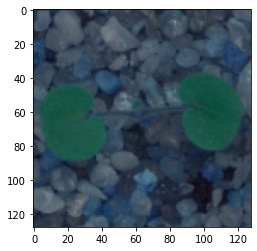

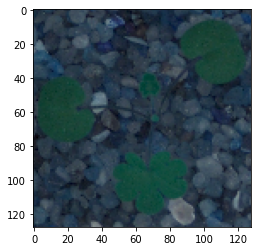

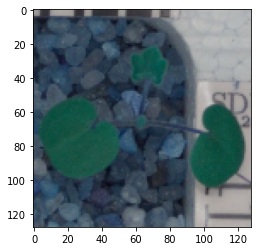

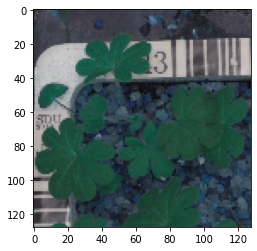

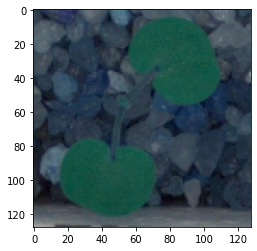

In [4]:
# visualize the images in dataset

# For the purpose of utilizing GPU, I will visulalize only the first five images.

for i in range(5):
  image = df[i]
  plt.imshow(image)
  plt.show()

In [5]:
# Data Pre-processing -- Normalization

# Checking the min and max before normalizing
print("Max value in the Data Frame:", df.max())
print("Min value in the Data Frame:", df.min())

# Apply Normalization
df = df.astype('float32')
df /= 255

Max value in the Data Frame: 255
Min value in the Data Frame: 0


In [6]:
print("Data Frame Shape:", df.shape)

# Checking the min and max before normalizing
print("Max value in the Data Frame:", df.max())
print("Min value in the Data Frame:", df.min())

# all data are fractions between 0 and 1 

Data Frame Shape: (4750, 128, 128, 3)
Max value in the Data Frame: 1.0
Min value in the Data Frame: 0.0


In [7]:
# Data Pre-processing -- Gaussian Blurring
for i in range(len(df)):
  image = df[i]
  blurred_image  = cv2.GaussianBlur(image, (5, 5), 0)
  df[i] = blurred_image

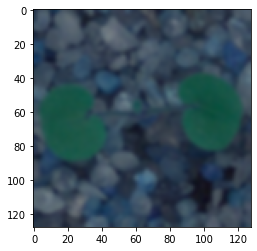

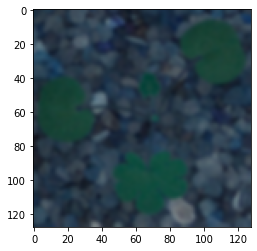

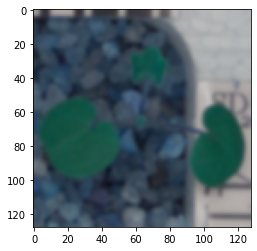

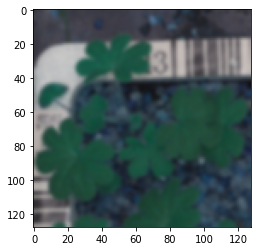

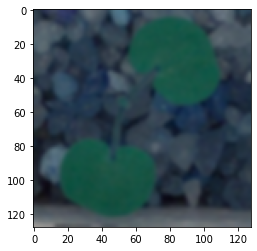

In [8]:
# Visualize data after pre-processing

# For the purpose of utilizing GPU, I will visulalize only the first five images.

for i in range(5):
  image = df[i]
  plt.imshow(image,cmap='gray')
  plt.show()

# as we can see the images are blurred after applying gaussian

In [9]:
# Check Lables

# 1. read labels from csv file
labels_df = pd.read_csv('/content/drive/My Drive/DLCP/Project 7/Data/Labels.csv')

# 2. create a list which contains unique labels
labels = labels_df['Label'].tolist()
unique_labels = set(labels)
labels_unique = list(unique_labels)

# 3. check number of labels we have
len(labels_unique)

# 4. summary
print('A total of ', len(labels_unique), ' labels were found.')
print('Labels are listed below: ')
print(labels_unique)

# 5.Create Dictionary for mapping
label_map = {'Small-flowered Cranesbill':0,'Fat Hen':1,'Cleavers':2,'Black-grass':3,'Scentless Mayweed':4,'Shepherds Purse':5,'Common wheat':6,'Common Chickweed':7,'Charlock':8,'Sugar beet':9,'Maize':10,'Loose Silky-bent':11}
for i in range(len(labels)):
  for k in label_map:
    if(labels[i] == k):
      labels[i] = label_map[k]

print(labels)
# we did this step to use integer inputs for "to_categorical" function used in below code cell.

A total of  12  labels were found.
Labels are listed below: 
['Cleavers', 'Sugar beet', 'Maize', 'Scentless Mayweed', 'Charlock', 'Common wheat', 'Small-flowered Cranesbill', 'Loose Silky-bent', 'Shepherds Purse', 'Black-grass', 'Common Chickweed', 'Fat Hen']
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0

In [10]:
# Convert labels to one-hot-vectors

from tensorflow.keras.utils import to_categorical

y_train = to_categorical(labels, num_classes=12)

print("Shape of y_train:", y_train.shape)

# we have 12 labels (output as expected)

Shape of y_train: (4750, 12)


In [11]:
# Print the label for y_train[0]

print("One value of y_train:", y_train[0])

One value of y_train: [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [12]:
#renaming for easing purpose

y = y_train

In [13]:
# Split the dataset into training, testing, and validation set

from sklearn.model_selection import train_test_split

# Training and Testing
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.3, random_state=42)

In [14]:
# Check Training and Testing shape

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(3325, 128, 128, 3)
(1425, 128, 128, 3)
(3325, 12)
(1425, 12)


In [15]:
# Further splitting: Create Validation set and re-create Testing set

X_validation, X_test, y_validation, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=42)

In [16]:
print(X_train.shape)
print(X_test.shape)
print(X_validation.shape)
print(y_train.shape)
print(y_test.shape)
print(y_validation.shape)

(3325, 128, 128, 3)
(713, 128, 128, 3)
(712, 128, 128, 3)
(3325, 12)
(713, 12)
(712, 12)


In [17]:
# already in compatible shape.

In [18]:
from tensorflow.keras.models import Sequential          # Sequential groups a linear stack of layers into a tf.keras.Model.
from tensorflow.keras.layers import Conv2D              # This layer creates a convolution kernel that is convolved with the layer input to produce a tensor of outputs.
from tensorflow.keras.layers import MaxPooling2D        # Max pooling operation for 2D spatial data.
from tensorflow.keras.layers import Flatten             # Flattens the input. Does not affect the batch size.
from tensorflow.keras.layers import Dense, Dropout      # Dropout: Applies Dropout to the input.
                                                        # Dense: Just your regular densely-connected NN layer.

In [19]:
# Building CNN


input_shape = (128,128,3)
num_classes = 12

# Define Layers

# Initialising the CNN classifier
classifier = Sequential()

# Add a Convolution layer with 32 kernels of 3X3 shape with activation function ReLU
classifier.add(Conv2D(32, (3, 3), input_shape = input_shape, activation = 'relu', padding = 'same'))

# Add a Max Pooling layer of size 2X2
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# Add another Convolution layer with 32 kernels of 3X3 shape with activation function ReLU
classifier.add(Conv2D(32, (3, 3), activation = 'relu', padding = 'same'))

# Adding another pooling layer
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# Add another Convolution layer with 32 kernels of 3X3 shape with activation function ReLU
classifier.add(Conv2D(32, (3, 3), activation = 'relu', padding = 'valid'))

# Adding another pooling layer
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# Flattening the layer before fully connected layers
classifier.add(Flatten())

# Adding a fully connected layer with 512 neurons
classifier.add(Dense(units = 512, activation = 'relu'))

# Adding dropout with probability 0.5
classifier.add(Dropout(0.5))


# Adding a fully connected layer with 128 neurons
classifier.add(Dense(units = 128, activation = 'relu'))


# The final output layer with 12 neurons to predict the categorical classifcation
classifier.add(Dense(units = 12, activation = 'softmax'))

In [20]:
# Set optimizer and loss function. (Use Adam optimizer and categorical crossentropy.)

classifier.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])


In [21]:
# Fit and evaluate model and print confusion matrix

# Fit model
classifier.fit(x = X_train, y = y_train, batch_size=32, epochs = 12,validation_data=(X_validation,y_validation))

# Evaluate model
scores = classifier.evaluate(X_test , y_test)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])



Epoch 1/12
104/104 [==============================] - 2s 18ms/step - loss: 2.4234 - accuracy: 0.1411 - val_loss: 2.3529 - val_accuracy: 0.1545
Epoch 2/12
104/104 [==============================] - 2s 15ms/step - loss: 1.9006 - accuracy: 0.3474 - val_loss: 1.5980 - val_accuracy: 0.4213
Epoch 3/12
104/104 [==============================] - 2s 15ms/step - loss: 1.4201 - accuracy: 0.5008 - val_loss: 1.1767 - val_accuracy: 0.6025
Epoch 4/12
104/104 [==============================] - 2s 15ms/step - loss: 1.1896 - accuracy: 0.5871 - val_loss: 1.0412 - val_accuracy: 0.6348
Epoch 5/12
104/104 [==============================] - 2s 15ms/step - loss: 1.0149 - accuracy: 0.6490 - val_loss: 1.0169 - val_accuracy: 0.6629
Epoch 6/12
104/104 [==============================] - 2s 15ms/step - loss: 0.8869 - accuracy: 0.6914 - val_loss: 0.8332 - val_accuracy: 0.7233
Epoch 7/12
104/104 [==============================] - 2s 15ms/step - loss: 0.7922 - accuracy: 0.7233 - val_loss: 0.9119 - val_accuracy: 0.6798

In [22]:
# Predict
y_predict = classifier.predict(X_test)

# We need to check the predictions to be able to plot the confusion matrix

In [24]:
#print(y_predict)

[[4.6801173e-07 1.5191313e-06 8.6466997e-04 ... 1.7045166e-04
  1.2804929e-04 1.4911750e-07]
 [8.6476075e-06 7.1521790e-05 2.9901654e-05 ... 3.8436301e-06
  1.3799391e-06 3.4103069e-01]
 [7.1892337e-06 2.6640815e-03 6.7192930e-05 ... 1.6605958e-02
  5.1659271e-03 2.5891243e-03]
 ...
 [2.5526662e-03 9.1001287e-02 1.6248715e-01 ... 3.5926927e-02
  1.6526984e-02 9.0524944e-04]
 [9.1630191e-06 1.0061469e-02 1.7905861e-05 ... 1.7193783e-02
  1.1806295e-02 1.9288970e-04]
 [9.9995065e-01 7.1955183e-06 1.6680509e-08 ... 4.8049515e-06
  9.8424235e-10 2.0884756e-09]]


In [30]:
# To get actual prediction values instead of scientific notations
rounded_predictions = np.argmax(y_predict,axis=1)
print(rounded_predictions)

[ 4  3  4  7 11  0  4  7  4 11  6  4  8  9  1 11  9  6  1  1  9 11 11  1
  1  3  7  5  8 11  0  7  0  8  2  6  5  9  8  8  4  1  5  0  1  7  6  4
  7 10  2  7  8  9  0  1 11  7  4  4  7  8  4  9 10  2  7  5  1  0  9  7
  8  4  7  2  2 11  7  0  4 11  9 11  8  7 11  5  0  0  7  4  9  0 11 11
 10  2  0 11  0  4 11  4  1  2  3  4  8  0 11  2 11  0  0  4  8  4 11  2
  4  7  0  0  0  5  1  0  1 11 11  8  3  4  1 11  0 10  2  2  2  0  0  8
  7  7  7  8  5  5  1  5 11  8  2  3  6  1  8  2 10  2  2  4  9  0 11 11
  8 11  7 11  1  7 11  4  4  0 11  7  4  4 11  8  8  0  1  9  2  6  7  5
 11  8  0  9  3  8  9  4 11  4  8  3 11 11 10  5 11  0  4  7  7  7  4  5
  9  0  6  7  0  2  4  1  2  1  0  3  7  2  5  9  7  5  2  5  5  3 11  1
  0  3  0  5  8  4 10  7  1  5  7  7  7  0  8 11  4  4  0  6  9  7  9  8
  7  1 11  1 11  0 11 10  4  0  5  8  7  3  0 11  8  1  4  1  9  8  4  0
  4  7  7 11  1  5 10  7  1  1  8  4 11  1  8 11  7  0  5  8  4 10  2 11
  1 11 11  8  9  4  5 11 10  0  8  1  9  0  7  4  3

In [37]:
# To get actual y_test values instead of one-hot vectors
rounded_y_test = np.argmax(y_test,axis=1)
print(rounded_y_test )

[ 4 11  4  7 11  0  4  7  4 11 11  4  8  9  1  3  9  6 11  1  9 11 11  1
  1 11  4  5  8  3  0  7  0  8  1  6  0  9  8  8  4  1  5  0  1  7  3  4
  7 10  2  7  8  9  9  1 11  7  1  2  7  8  5  9 10  2  7  1  1  0  9  7
  8  4  7  2  2 11  7  0  4 11  1 11  8  3  3  5  0  8  7  4  9  0  6  3
 10  0  7 11  0  4 11  4  1  4  6  3  8  0  6  2 11  0  0  4  8 10 11  2
  2  7  0  5  0  5  1  0  1 11  3  8  6  4  1 11  0  4  4  2  2  0 11  8
  7  7  7  8  1  5  1  5  3  8  2  6 11  6  9  2  5  2  2  4  9  0 11  3
  8 11  7 11  1  9 11  4  4  0 11  7  7  4 11  8  1  0  9  9  2 11  7  5
 11  8  0  1 11  8  9  7 11  4  8 11  3 11 10  5 11  0  9  7  7  7  4  7
  9  0  1  7  0  2  4  1  2  1  0 11  7  8  7  9  7  5  2  8  5 11  3  1
  0 11  0  5  8  4 10  7  1  5  7  7  7 11  8 11  1  4  0  6  9  7  9 10
  7  1 11  1 11  0 11 10  4  0  1  4  7  3  0  3  8  1  4  1  9  8  4  0
  4  7  7 11  1  5 10  7  1  1  8  4 11  1  8 11  7  9  5  8  4 10  2 11
  1 11 11  8  9 10  1  6 10  0  5  9 10  0  7  4 11

In [ ]:
# The above two steps were needed to be able to plot the confusion matrix

In [38]:
# creating test_labels which contains all labels in the test dataset
test_labels = []
for k in label_map:
  test_labels.append(label_map[k])
#print(test_labels)
#print(y_test)


from sklearn.metrics import confusion_matrix
# Create confusion matrix
cm = confusion_matrix(y_true=rounded_y_test, y_pred=rounded_predictions)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]]


In [51]:
# Function to plot (source: https://www.youtube.com/watch?v=VYGVOwlT4oE)
# I changed it as suitable
import itertools    
def plot_confusion_matrix(cm, classes,
                        normalize=False,
                        title='Confusion matrix',
                        cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.figure(figsize = (70,50))


In [52]:
cm_plot_labels = labels_unique

Confusion matrix, without normalization
[[82  0  1  0  0  4  0  0  1  0  0  0]
 [ 1 44  2  0  3  7  3  1  2  3  0  0]
 [ 0  0 38  0  3  0  0  0  0  0  0  0]
 [ 0  1  0  5  2  0  2  1  0  1  1 26]
 [ 1  1  5  1 64  1  0  1  3  0  2  0]
 [ 1  0  2  0  3 23  0  0  3  0  2  0]
 [ 0  2  1  4  0  0  9  0  0  1  0 12]
 [ 2  0  0  0  3  5  1 79  0  0  1  0]
 [ 1  0  5  0  0  2  0  0 60  0  0  0]
 [ 3  4  0  0  3  0  0  2  1 40  2  0]
 [ 0  0  0  0  2  0  0  0  1  1 23  0]
 [ 2  3  0 11  1  0  4  0  0  1  0 74]]


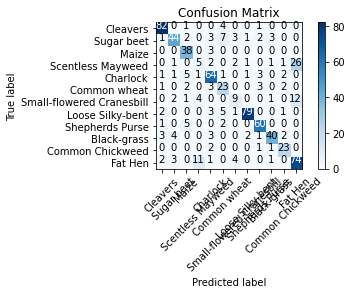

<Figure size 5040x3600 with 0 Axes>

In [53]:
#Confusion matrix
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')

x_test[2] is: 


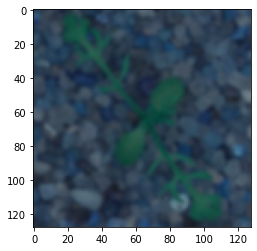

It was predicted as:  Scentless Mayweed
x_test[3] is: 


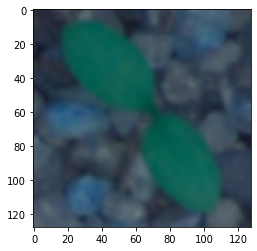

It was predicted as:  Common Chickweed
x_test[33] is: 


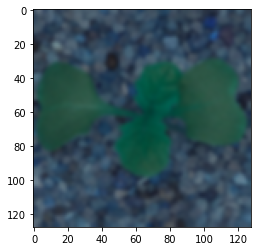

It was predicted as:  Charlock
x_test[36] is: 


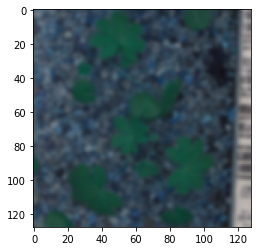

It was predicted as:  Shepherds Purse
x_test[59] is: 


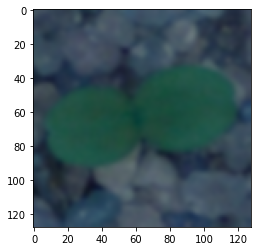

It was predicted as:  Scentless Mayweed


In [65]:
# Visualize predictions

# 1. x_test[2]
print('x_test[2] is: ')
#visualize x_test[2]
image = X_test[2]
plt.imshow(image)
plt.show()
#mapping prediction to actual label name
for k in label_map:
  if(label_map[k] == rounded_predictions[2]):
    pre = k
#printing
print('It was predicted as: ', pre)




# 2. x_test[3]
print('x_test[3] is: ')
#visualize x_test[3]
image = X_test[3]
plt.imshow(image)
plt.show()
#mapping prediction to actual label name
for k in label_map:
  if(label_map[k] == rounded_predictions[3]):
    pre = k
#printing
print('It was predicted as: ', pre)


# 3. x_test[33]
print('x_test[33] is: ')
#visualize x_test[33]
image = X_test[33]
plt.imshow(image)
plt.show()
#mapping prediction to actual label name
for k in label_map:
  if(label_map[k] == rounded_predictions[33]):
    pre = k
#printing
print('It was predicted as: ', pre)


# 4. x_test[36]
print('x_test[36] is: ')
#visualize x_test[36]
image = X_test[36]
plt.imshow(image)
plt.show()
#mapping prediction to actual label name
for k in label_map:
  if(label_map[k] == rounded_predictions[36]):
    pre = k
#printing
print('It was predicted as: ', pre)

# 5. x_test[59]

print('x_test[59] is: ')
#visualize x_test[59]
image = X_test[59]
plt.imshow(image)
plt.show()
#mapping prediction to actual label name
for k in label_map:
  if(label_map[k] == rounded_predictions[59]):
    pre = k
#printing
print('It was predicted as: ', pre)

In [ ]:
# -- End of project -- 